In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import (cauchy, norm, exponweib, t)
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [2]:
df = pd.read_csv('/content/sample_data/device_data.csv')

Рассмотрим статистики:

In [3]:
df.describe()

,device_0
count,267.000000
mean,4.883416
std,3.057072
min,-4.367143
25%,2.819708
50%,5.091945
75%,6.772408
max,12.174385


Дисперсия:

In [4]:
df.var(ddof=0).iloc[0]

9.310685260726746

Построим гистограмму загруженных значений:

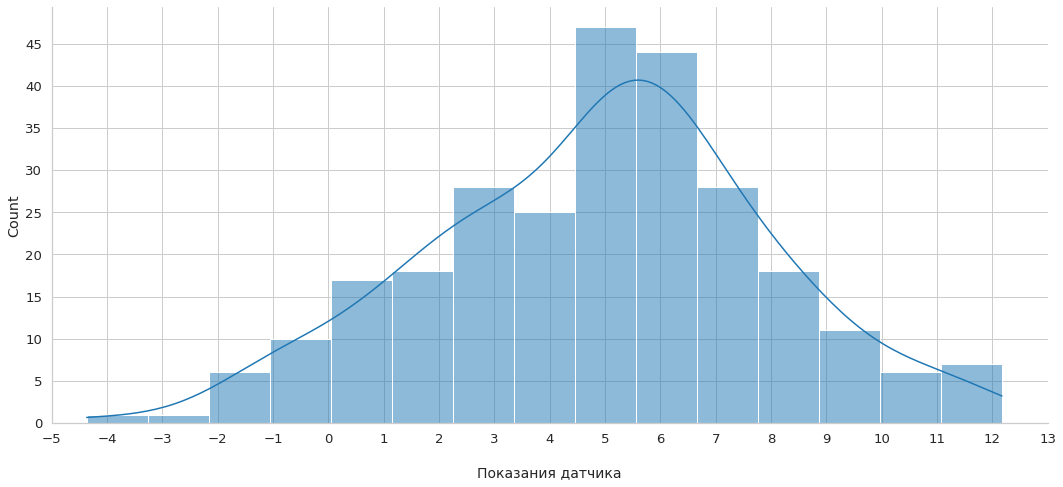

In [6]:
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)
hstplt = sns.histplot(df, bins=15, legend=False, kde=True)

hstplt.xaxis.set_major_locator(MultipleLocator(1))
hstplt.yaxis.set_major_locator(MultipleLocator(5))
hstplt.set(xlim=(df.describe().loc['min', 'device_0']//1, df.describe().loc['max', 'device_0']//1 + 1))
plt.xlabel('\nПоказания датчика', fontsize=14)
sns.despine()
plt.tight_layout()

Из графика видно, что распределение несимметрично, имеет достаточно острый пик в медиане и сильную неоднародность в области первого квартиля.\
Судя по значениям, вероятнее всего датчик регистрирует некоторую непрерывную величину. По форме распределения предположим модель и Коши и Гаусса.

Совместим на одном графике нормированную гистограмму фактических значений, плотность ее распределения и модели Коши и Гаусса.

In [7]:
data = np.linspace(
    df.describe().loc['min', 'device_0'],
    df.describe().loc['max', 'device_0'],
    df.describe().loc['count', 'device_0'].astype(int))

In [8]:
cauchy_r = cauchy.pdf(
    data, 
    loc=df.describe().loc['50%', 'device_0'] + 0.5,
    scale=2.11)

In [9]:
norm_r = norm.pdf(
    data, 
    loc=df.describe().loc['50%', 'device_0'] + 0.5,
    scale=2.65)

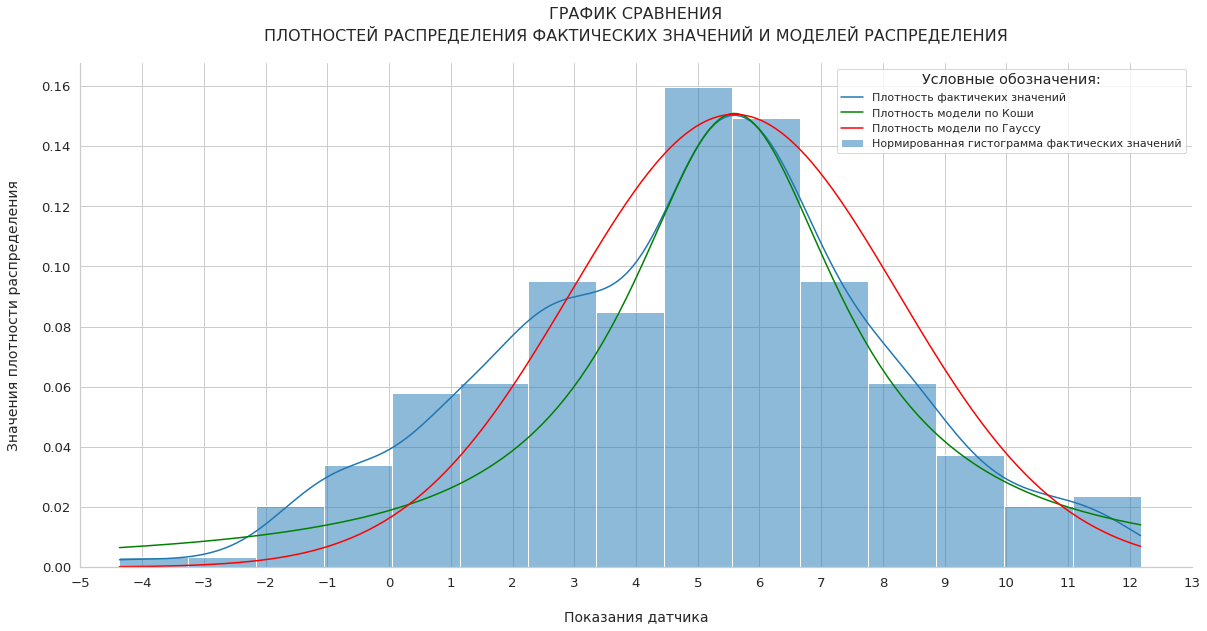

In [10]:
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

fig, ax = plt.subplots(figsize=(17,9))

sns.histplot(df, legend=False, stat='density', bins=15)
sns.kdeplot(data=df, x='device_0', legend=False, bw_adjust=0.7, cut=0)
sns.lineplot(x=data, y=cauchy_r, color='green')
sns.lineplot(x=data, y=norm_r, color='red')

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(0.02))
ax.set(xlim=(df.describe().loc['min', 'device_0']//1, df.describe().loc['max', 'device_0']//1 + 1))
plt.xlabel('\nПоказания датчика', fontsize=14)
plt.ylabel('Значения плотности распределения\n', fontsize=14)
plt.title(str.upper('График сравнения\nплотностей распределения фактических значений и моделей распределения\n'), fontsize=16)
plt.legend(
    title='Условные обозначения:',
    labels=['Плотность фактичеких значений', 
     'Плотность модели по Коши', 
     'Плотность модели по Гауссу', 
     'Нормированная гистограмма фактических значений'],
     fontsize=11)
sns.despine()
plt.tight_layout()

Из графика видно, что в диапазане значений >= 4, распределение наилучшим образом описывает модель Коши и фактическое распределение не является нормальным. А начиная с области первого квартиля и ниже модель не подходит, требуется ее корректировка.